Quantum gates are the fundamental building blocks of quantum computers and are used to manipulate the states of qubits (quantum bits). These gates perform essential functions that enable quantum computers to be significantly faster  more powerful compared to classical computers.

Here, we will examine examples that can be solved in the field of Quantum Computing by focusing on basic quantum circuits and operations, which we will explore in three sections.

## Problem 1: Creating and Measuring Bell State

In the theory section, we discussed what a Bell State is. Here, we will briefly discuss how to create the Bell State theoretically, and then we will code it.

The Bell State can be created using two qubits as follows:

* Apply a Hadamard Gate (H) to the first qubit to create a superposition state,
* Apply a CNOT (controlled-Not) gate between the first and second qubits to create entanglement.

When these operations are applied, the resulting state should be the Bell State formulated below:

                    |Φ⁺⟩ = (1/√2)(|00⟩ + |11⟩)

In this state, the measurement outcomes of the two qubits are correlated:
* **If one is 0, the other will also be 0,**
* **If one is 1, the other will also be 1.**

**Now let's code this state below.**


In [4]:
# 1 .
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

In [5]:
# 2.
qc = QuantumCircuit(2, 2)

After adding the necessary libraries, we created the 2 qubits required for the Bell State above. Additionally, we created 2 classical bits to measure these 2 qubits.

In [6]:
# 3.
qc.h(0)

In this step, we applied the Hadamard Gate to the first qubit (the 0 parameter here represents the first qubit) and put the circuit into superposition.

In [7]:
# 4.
qc.cx(0, 1)

Here, we applied a CNOT gate between the first qubit and the second qubit. This allowed us to obtain the entanglement state in the circuit.

In [8]:
# 5.
qc.measure([0, 1], [0, 1])

In the above step, the measurement process of qubits is carried out. There's an important aspect to discuss here:
* [0,1]: Specifies the indices of the qubits to be measured. In our circuit, we had 2 qubits, and we used 0 and 1 since we wanted to measure these 2 qubits.
* [0,1]: Specifies the indices of the classical bits where the measurement results will be stored.

Through this measurement process, specific qubits in the quantum circuit are measured, and the results are recorded in the specified classical bits. Each qubit is recorded as a result among the classical bits, and these results can be utilized as the output of the quantum circuit or further analyzed.

In [9]:
# 6.
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)

This code simulates a quantum circuit using Qiskit's Aer simulator. Firstly, we import the Aer simulator, which represents a simulator backend provided by Qiskit. Then, we use the `transpile` function to convert the quantum circuit named `qc` (a QuantumCircuit object) into a format suitable for the specified simulator. This ensures that the circuit is prepared in accordance with the features and limitations supported by the simulator.

In [10]:
# 7.
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc)

Here, running the compiled quantum circuit on the **Aer simulator*** allows us to obtain results.
The compiled quantum circuit;

* executed with the parameter `shots=1000`, indicating that the circuit simulation will be performed 1000 times, ensuring that the circuit is run 1000 times repeatedly.

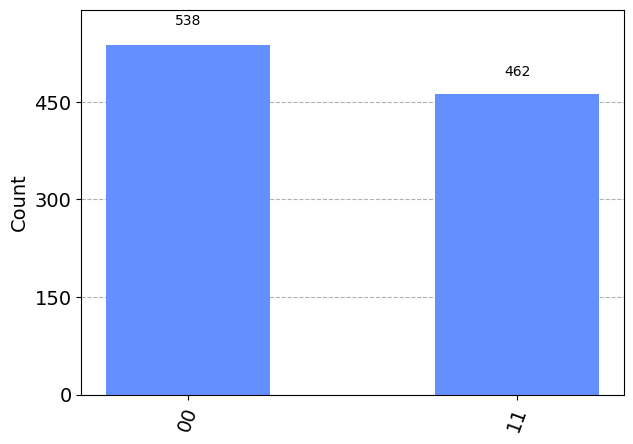

In [11]:
# 8.
plot_histogram(counts)

Here, the outcome of the operations performed above is visualized.

Here;
* The state "00" represents the qubit being in the state "00". In the example above, it is shown that out of 1000 simulations, the qubits were in this state 538 times, and in the state "11" 462 times.